In [686]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import scipy
import math
from PIL import Image
from scipy import ndimage

#from lr_utils import load_dataset


In [687]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
 
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    print("hi5"+"hola como estas")
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [688]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y, classes = load_dataset()
train_set_y_orig.shape

hi5hola como estas


(1, 209)

y = [1] , es =='cat'==imagen


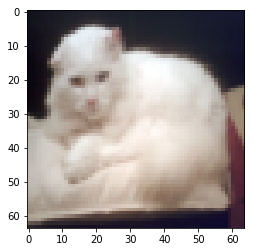

In [689]:
index = 13
plt.imshow(train_set_x_orig[index])
print("y = "+str(train_set_y_orig[:,index])+ " , es =='"+classes[np.squeeze(train_set_y_orig[:, index])].decode("utf-8")+ "'==imagen")

In [690]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print(m_train)
print(m_test)
print(num_px)


209
50
64


(12288, 209)
[[158 115 255 ...  41  18 133]
 [104 110 253 ...  47  18 163]
 [ 83 111 254 ...  84  16  75]
 ...
 [173 171 133 ... 183 144   5]
 [128 176 101 ... 141 137  22]
 [110 186 121 ... 116 108   5]]


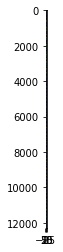

In [695]:
train_set_x_flatten  = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
print(train_set_x_flatten.shape)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print(test_set_x_flatten)
plt.imshow(test_set_x_flatten)

In [696]:
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255
print(train_set_x.shape)

(12288, 209)


In [697]:
def inicializate_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [698]:
w,b=inicializate_with_zeros(train_set_x.shape)

TypeError: 'tuple' object cannot be interpreted as an integer

In [699]:
def sigmoide(x):
     return 1 / (1 + math.e **-x)

In [700]:
def propagate(w,b,X,Y):
    print(w)
    print(b)
    print(X)
    print(Y)
    m=X.shape[1]
    A=sigmoide( np.dot(w.T,X)+b)
    print("hola"+str(A))
    cost = -1/m * np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))
    
    dw = 1/m * np.dot(X,(A-Y).T)
    db = 1/m * np.sum(A-Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,  "db": db}
    return grads,cost


In [701]:
print("salida esperada")
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

salida esperada
[[1.]
 [2.]]
2.0
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.99987661 0.99999386 0.00449627]]
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [702]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iterations):
        grads,cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w= w-dw*learning_rate
        b= b-db*learning_rate
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

In [703]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

[[1.]
 [2.]]
2.0
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.99987661 0.99999386 0.00449627]]
[[0.9910139 ]
 [1.97844435]]
1.999986899796769
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.99986717 0.99999318 0.00485901]]
[[0.98202891]
 [1.95689227]]
1.9999727416916735
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.99985702 0.99999243 0.00525079]]
[[0.97304514]
 [1.93534406]]
1.999957440947852
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.9998461 0.9999916 0.0056739]]
[[0.96406267]
 [1.91380001]]
1.9999409061556137
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.99983434 0.99999068 0.00613079]]
[[0.95508162]
 [1.89226047]]
1.999923038725952
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.99982169 0.99998966 0.00662412]]
[[0.94610209]
 [1.87072579]]
1.9999037323487747
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.99980807 0.99998852 0.00715672]]
[[0.9371242 ]
 [1.84919636]]
1.9998828724139308
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]


 [0.50163738]]
1.97123145167667
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.97899325 0.99106546 0.50011359]]
[[0.35815445]
 [0.48513475]]
1.9698209347791578
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.97776017 0.99030755 0.51480449]]
[[0.35082374]
 [0.46879334]]
1.968372318121316
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.97646789 0.98949344 0.5293188 ]]
[[0.34354533]
 [0.45261267]]
1.966886477728359
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.97511451 0.98861972 0.54363388]]
[[0.33631917]
 [0.43659209]]
1.965364373419296
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.97369809 0.98768287 0.55772904]]
[[0.32914516]
 [0.42073081]]
1.9638070433990853
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.97221673 0.98667923 0.5715856 ]]
[[0.3220232 ]
 [0.40502793]]
1.962215598727987
[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
hola[[0.97066849 0.98560499 0.58518685]]
[[0.31495312]
 [0.38948245]]
1.960591217747559
[[ 1.   2.  -1. ]
 [ 

In [704]:
def predict(w,b,X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    Y_DESTINO = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoide(np.dot(w.T,X)+b)
    #Obtener la predicción sin usar for
    Y_DESTINO = np.round(A)
    for i in range(A.shape[1]):
        if (A[0,i] <= 0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    assert(Y_prediction.shape == (1, m))
    print("Mi prediccion: ",Y_DESTINO)
    return Y_prediction

In [705]:
#Prueba de la predicción
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

Mi prediccion:  [[1. 1. 0.]]
predictions = [[1. 1. 0.]]


In [706]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost =False):
    w,b=inicializate_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations= 100, learning_rate = 0.009, print_cost = False)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train =predict(w,b,X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs, "Y_prediction_test": Y_prediction_test,"Y_prediction_train":Y_prediction_train,"w":w,"b":b,"learning_rate":learning_rate,"num_iterations":num_iterations}
    return d

In [707]:
d = model(train_set_x,train_set_y_orig,test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005,print_cost = True)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0
[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
hola[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  

[[ 0.00032019]
 [-0.00057752]
 [-0.00013951]
 ...
 [-0.00033024]
 [-0.00093454]
 [ 0.00030268]]
-0.0011475104136611423
[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
hola[

hola[[7.35233190e-03 2.05409549e-04 1.04406450e-04 1.67561416e-03
  3.89296051e-03 1.04210786e-02 3.91645243e-03 4.38634525e-03
  5.41031075e-04 1.32436143e-03 7.33797312e-05 3.25762733e-04
  2.37272304e-03 3.42862779e-05 7.57462903e-05 1.69374087e-05
  2.46991248e-05 2.35785395e-06 1.16795776e-04 2.90185108e-02
  1.22868074e-04 2.59152495e-03 4.18151242e-06 1.59784654e-05
  1.07250307e-04 4.99547647e-02 3.02944223e-04 3.26099836e-04
  1.79196945e-03 4.82388056e-04 1.04047790e-02 1.51299371e-04
  5.45325187e-04 1.69705498e-04 9.79427361e-04 5.40084290e-03
  5.20189046e-04 8.86610285e-06 1.83791100e-01 1.29444848e-03
  3.09949610e-04 1.90925645e-02 2.86491448e-04 5.71700050e-05
  2.07600538e-04 7.91920879e-03 2.99834965e-04 2.83799694e-03
  5.90809567e-04 8.99243914e-04 1.68117733e-05 2.44033971e-04
  1.24076594e-04 2.11259763e-05 2.76766227e-03 1.15156350e-05
  2.27462792e-03 5.48466316e-06 2.19269700e-02 9.00593054e-03
  7.35511342e-03 6.93423610e-04 4.49844406e-05 8.80889357e-04
  5.

hola[[0.44014698 0.21999322 0.45870166 0.03989907 0.2024836  0.35868926
  0.18078636 0.57108505 0.23164352 0.24386181 0.41395081 0.33176418
  0.39820899 0.35405835 0.1960336  0.21761673 0.14008584 0.08035608
  0.24775447 0.6647192  0.14527084 0.16592528 0.24036488 0.29927837
  0.42275886 0.49341442 0.14936689 0.32832399 0.21746119 0.1842815
  0.2341523  0.39799425 0.5352199  0.37112747 0.12879972 0.47587964
  0.16474029 0.23755102 0.52878484 0.456032   0.1160356  0.21005205
  0.43448555 0.18578582 0.12864971 0.37587322 0.29519996 0.46158081
  0.04689124 0.34511272 0.33794668 0.35522171 0.23596269 0.43393157
  0.40995714 0.11884163 0.61146819 0.39546546 0.29140249 0.63126996
  0.61263784 0.38125465 0.12630104 0.2364561  0.26519534 0.3338253
  0.35491325 0.26079463 0.32568775 0.1917838  0.31314497 0.67030732
  0.23683729 0.55080757 0.36120612 0.38594485 0.0553811  0.2764925
  0.12954348 0.26224351 0.07716251 0.21840442 0.21887789 0.52884026
  0.45690972 0.19098075 0.22654663 0.32873278 0

[[ 0.00321787]
 [-0.00291831]
 [-0.00066103]
 ...
 [-0.00190309]
 [-0.00549109]
 [ 0.00282167]]
-0.001789732283686056
[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
hola[[

  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
hola[[6.92155773e-02 4.41235392e-03 1.16589935e-02 1.95323519e-03
  2.41033011e-02 6.76482990e-02 1.64881332e-02 1.47377235e-01
  8.11081403e-03 1.41622247e-02 9.53003419e-03 1.63532958e-02
  3.93245522e-02 8.44005991e-03 3.35225818e-03 1.13529239e-03
  1.36158465e-03 2.67334536e-04 4.34097653e-03 3.23512416e-01
  2.33142238e-03 1.32588901e-02 1.03744796e-03 1.89107274e-03
  1.17686705e-02 2.43034309e-01 4.46147535e-03 1.33764695e-02
  1.92751865e-02 1.04406030e-02 4.31926647e-02 5.48546110e-03
  3.56843133e-02 8.40536103e-03 8.24621759e-03 5.51234368e-02
  4.80278333e-03 1.11618383e-03 3.83234378e-01 3.30437014e-02
  3.09261112e-03 4.97895479e-02 2.00838196e-02 2.24970164e-03
  2.95330782e-03 6.76774227e-02 8.79109291e-03 4.64744814e-02
  2.15601696e-03 1.78785361e-02 3.02680310e-03 1.20446804e-02
  5.25595542e-03 5.25106518e-03 5.98086429e-02 5.66422772e-04
  1.01607146e-01 2.17295343e-03 6.17729333e-02 2.13125098e-01
  1.

[[ 0.00439383]
 [-0.00457543]
 [-0.00145245]
 ...
 [-0.00312937]
 [-0.00812298]
 [ 0.00412587]]
-0.0019674797418353
[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
hola[[0.

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

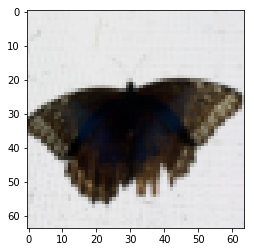

In [714]:
index = 13
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print (classes[d["Y_prediction_test"][0,index]].decode("utf-8"))

In [ ]:
matr=[   [[155,233,54],[4,5,6],[244,0,123],[10,11,12],[13,14,15]]  ,  [[16,17,18],[19,20,21],[22,23,24],[25,26,27],[28,29,30]]  ,  [[31,32,33],[34,35,36],[37,38,39],[40,41,42],[43,44,45]],  [[46,47,48],[49,50,51],[52,53,54],[55,57,58],[59,60,61]]   ]   ,   [   [[62,63,64],[65,66,67],[68,69,70],[71,72,73],[74,75,76]]  ,  [[77,78,79],[80,81,82],[83,84,85],[86,87,88],[89,90,91]]  ,  [[92,93,94],[95,96,97],[98,99,100],[101,102,103],[104,105,106]],  [[107,108,109],[110,111,112],[113,114,115],[116,117,118],[119,120,121]]   ]
a=np.array(matr)
print(a.shape)
print(a[0,0,0,1])
plt.imshow(a[0])

In [ ]:
64*64*3

In [678]:
print(Y)

[[1 0 1]]
